# 📊 Exploratory Data Analysis (EDA)
## House Prices - Advanced Regression Techniques

**Objetivo:** Entender la estructura, distribuciones, correlaciones y problemas del dataset

**Dataset:** Kaggle House Prices Competition
- Train: 1460 observaciones, 79 features + target (SalePrice)
- Test: 1459 observaciones, 79 features

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Librerías importadas")

✅ Librerías importadas


## 1. Carga de Datos

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

train.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("="*70)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*70)
train.info()

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Análisis del Target: SalePrice

In [5]:
print("="*70)
print("ANÁLISIS DE SALEPRICE (TARGET)")
print("="*70)

print(f"Media: ${train['SalePrice'].mean():,.2f}")
print(f"Mediana: ${train['SalePrice'].median():,.2f}")
print(f"Desv. Estándar: ${train['SalePrice'].std():,.2f}")
print(f"Mínimo: ${train['SalePrice'].min():,.2f}")
print(f"Máximo: ${train['SalePrice'].max():,.2f}")

print(f"Skewness: {skew(train['SalePrice']):.4f}")
print(f"Kurtosis: {kurtosis(train['SalePrice']):.4f}")


ANÁLISIS DE SALEPRICE (TARGET)
Media: $180,921.20
Mediana: $163,000.00
Desv. Estándar: $79,442.50
Mínimo: $34,900.00
Máximo: $755,000.00
Skewness: 1.8809
Kurtosis: 6.5098


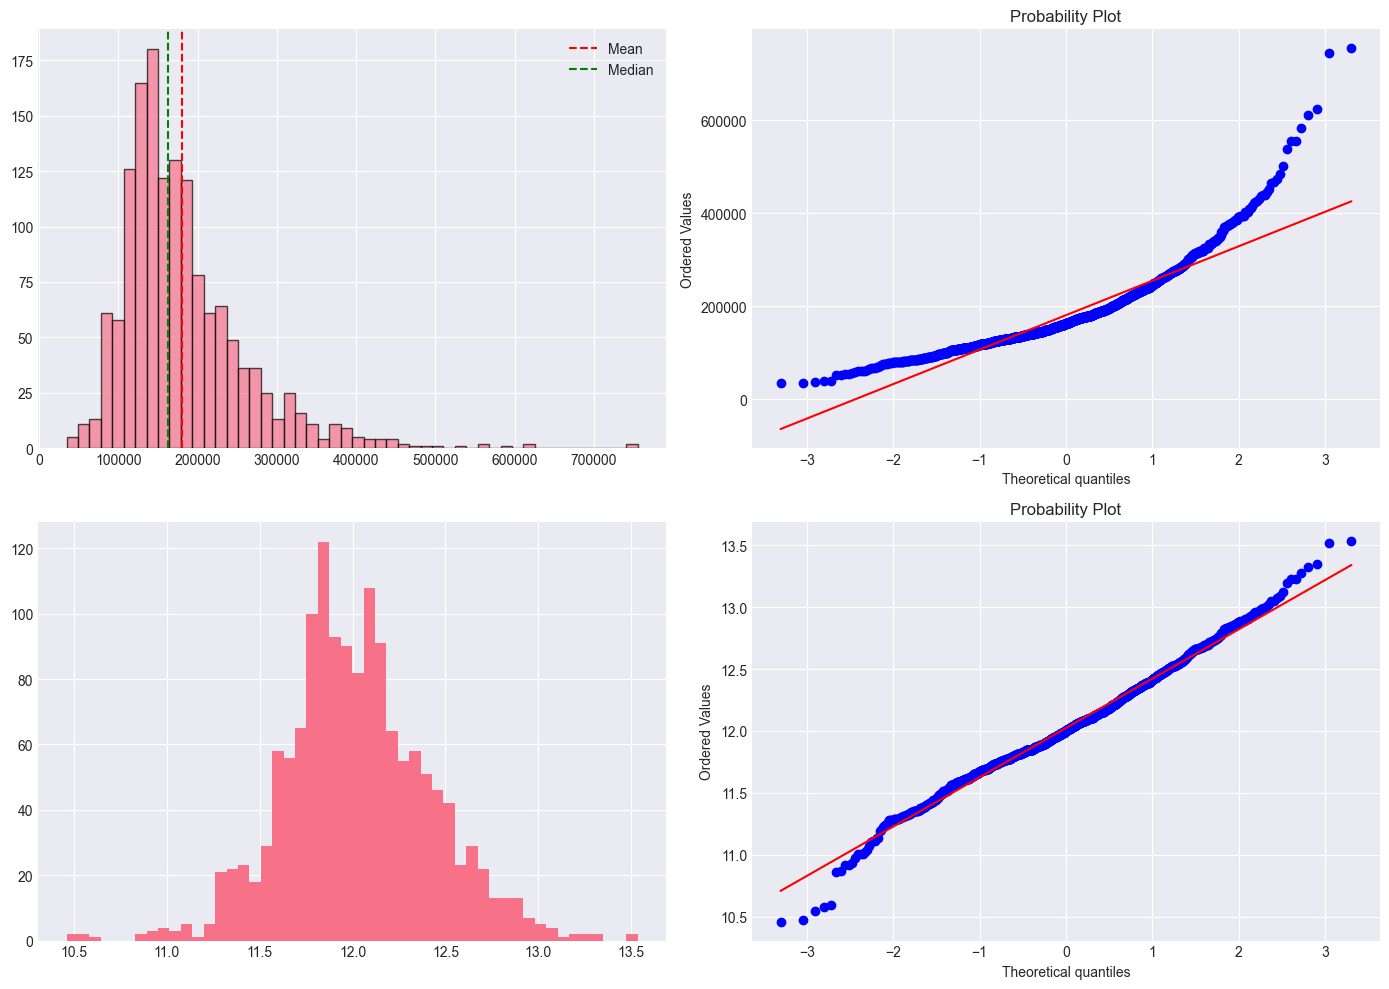

Skewness después de log: 0.1212


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma
axes[0, 0].hist(train['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train['SalePrice'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(train['SalePrice'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].legend()

# Q-Q plot
stats.probplot(train['SalePrice'], dist="norm", plot=axes[0, 1])

# Log transform
log_price = np.log1p(train['SalePrice'])
axes[1, 0].hist(log_price, bins=50)

stats.probplot(log_price, dist="norm", plot=axes[1, 1])

plt.tight_layout()
plt.show()

print(f"Skewness después de log: {skew(log_price):.4f}")

## 3. Valores Faltantes

In [7]:
def analyze_missing(df, name='Dataset'):
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)

    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Missing_Pct': missing_pct.values
    })

    missing_df = missing_df[missing_df['Missing_Count'] > 0] \
        .sort_values('Missing_Pct', ascending=False)

    print(f"\nMISSING VALUES - {name}")
    print(missing_df.head(10))

    return missing_df

missing_train = analyze_missing(train, 'TRAIN')
missing_test = analyze_missing(test, 'TEST')


MISSING VALUES - TRAIN
          Column  Missing_Count  Missing_Pct
72        PoolQC           1453    99.520548
74   MiscFeature           1406    96.301370
6          Alley           1369    93.767123
73         Fence           1179    80.753425
25    MasVnrType            872    59.726027
57   FireplaceQu            690    47.260274
3    LotFrontage            259    17.739726
58    GarageType             81     5.547945
59   GarageYrBlt             81     5.547945
60  GarageFinish             81     5.547945

MISSING VALUES - TEST
         Column  Missing_Count  Missing_Pct
72       PoolQC           1456    99.794380
74  MiscFeature           1408    96.504455
6         Alley           1352    92.666210
73        Fence           1169    80.123372
25   MasVnrType            894    61.274846
57  FireplaceQu            730    50.034270
3   LotFrontage            227    15.558602
63   GarageQual             78     5.346127
64   GarageCond             78     5.346127
59  GarageYrBlt   

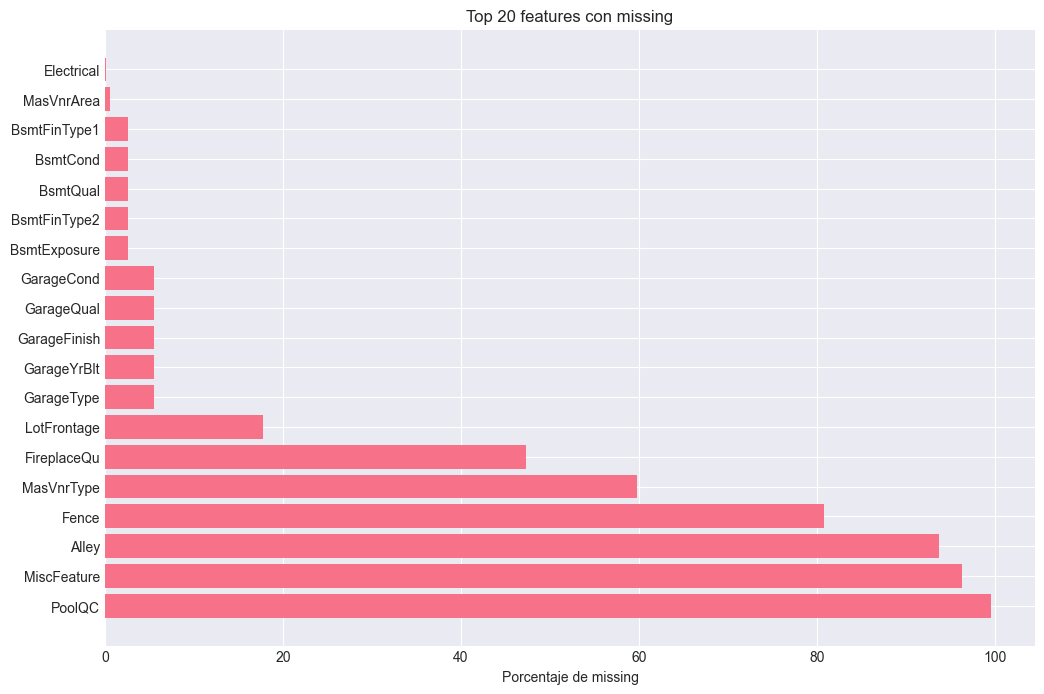

In [8]:
top_missing = missing_train.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_missing['Column'], top_missing['Missing_Pct'])
plt.xlabel('Porcentaje de missing')
plt.title('Top 20 features con missing')
plt.show()

## 4. Análisis de Features Numéricas

In [9]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Id')
numeric_features.remove('SalePrice')

correlations = train[numeric_features + ['SalePrice']] \
    .corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)

correlations.head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

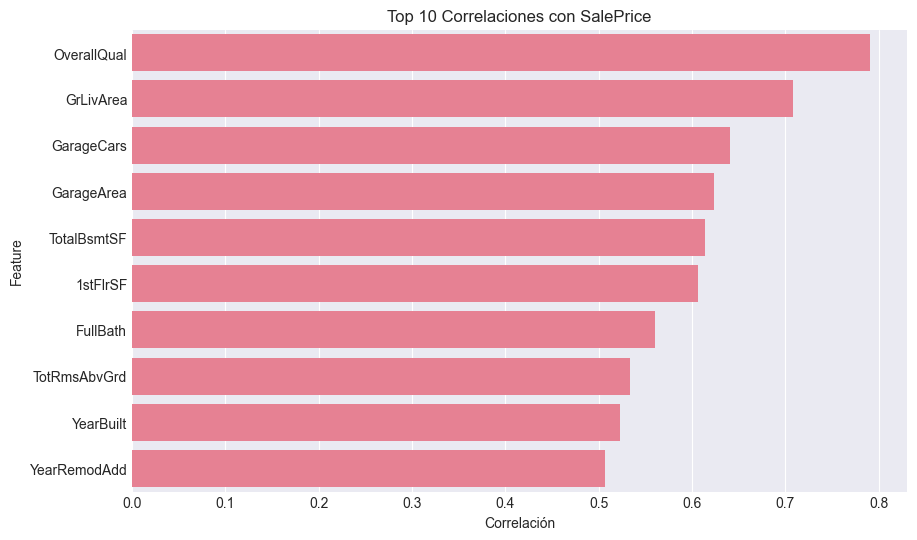

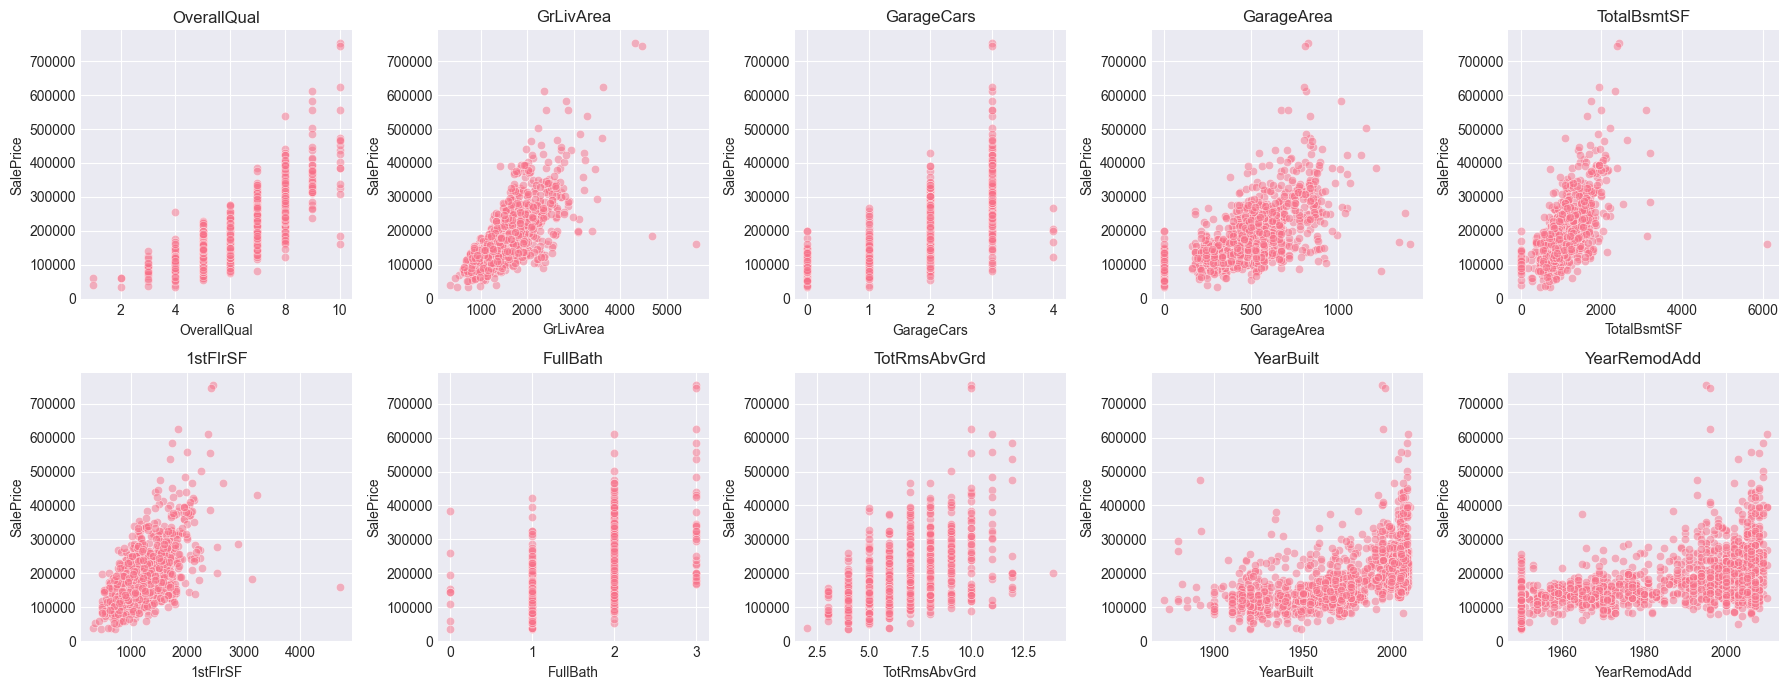

In [10]:
# Correlación de variables numéricas con el target
numeric_cols = train.select_dtypes(include=[np.number]).columns
corr_target = train[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)

# Top 10 correlaciones (positivas)
top_corr = corr_target[1:11]

# --- Barra de correlaciones ---
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 Correlaciones con SalePrice")
plt.xlabel("Correlación")
plt.ylabel("Feature")
plt.show()

# --- Scatter plots ---
fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for i, feature in enumerate(top_corr.index):
    sns.scatterplot(
        x=train[feature],
        y=train['SalePrice'],
        ax=axes[i],
        alpha=0.5
    )
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

## 5. Features Categóricas

📊 Cardinalidad de variables categóricas (Top 10):
Neighborhood    25
Exterior2nd     16
Exterior1st     15
Condition1       9
SaleType         9
HouseStyle       8
RoofMatl         8
Condition2       8
Functional       7
BsmtFinType2     6
dtype: int64


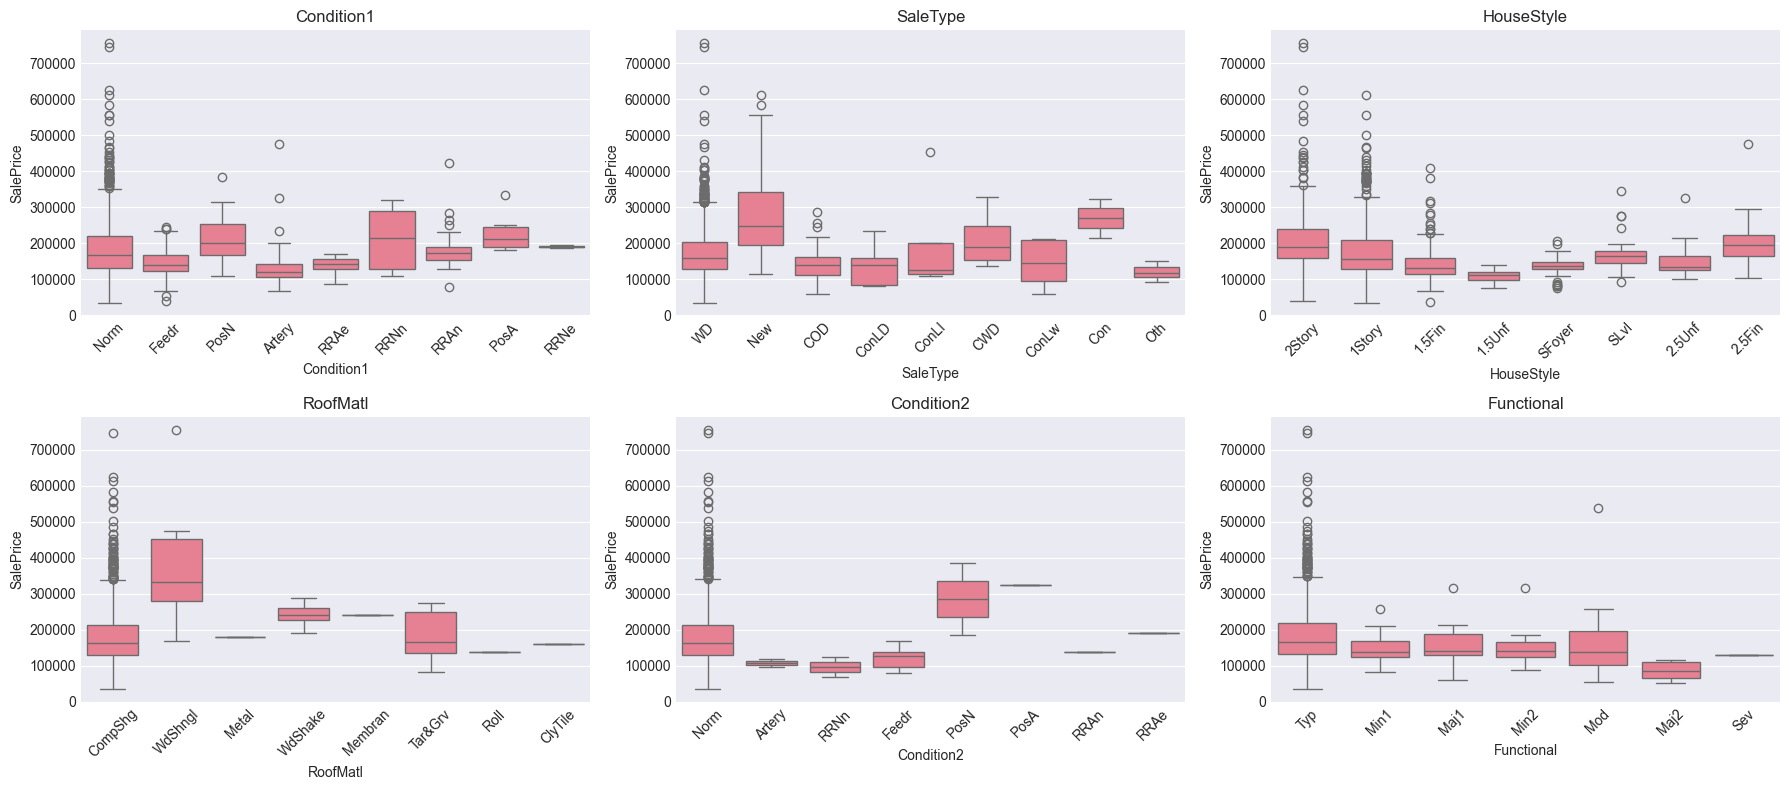

In [11]:
# Selección de columnas categóricas
categorical_cols = train.select_dtypes(include=['object']).columns

# Cardinalidad
cardinality = train[categorical_cols].nunique().sort_values(ascending=False)

print("📊 Cardinalidad de variables categóricas (Top 10):")
print(cardinality.head(10))

# Seleccionamos categóricas con baja cardinalidad para boxplots
low_card_cols = cardinality[cardinality <= 10].index[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(low_card_cols):
    sns.boxplot(
        x=train[col],
        y=train['SalePrice'],
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Detección de Outliers

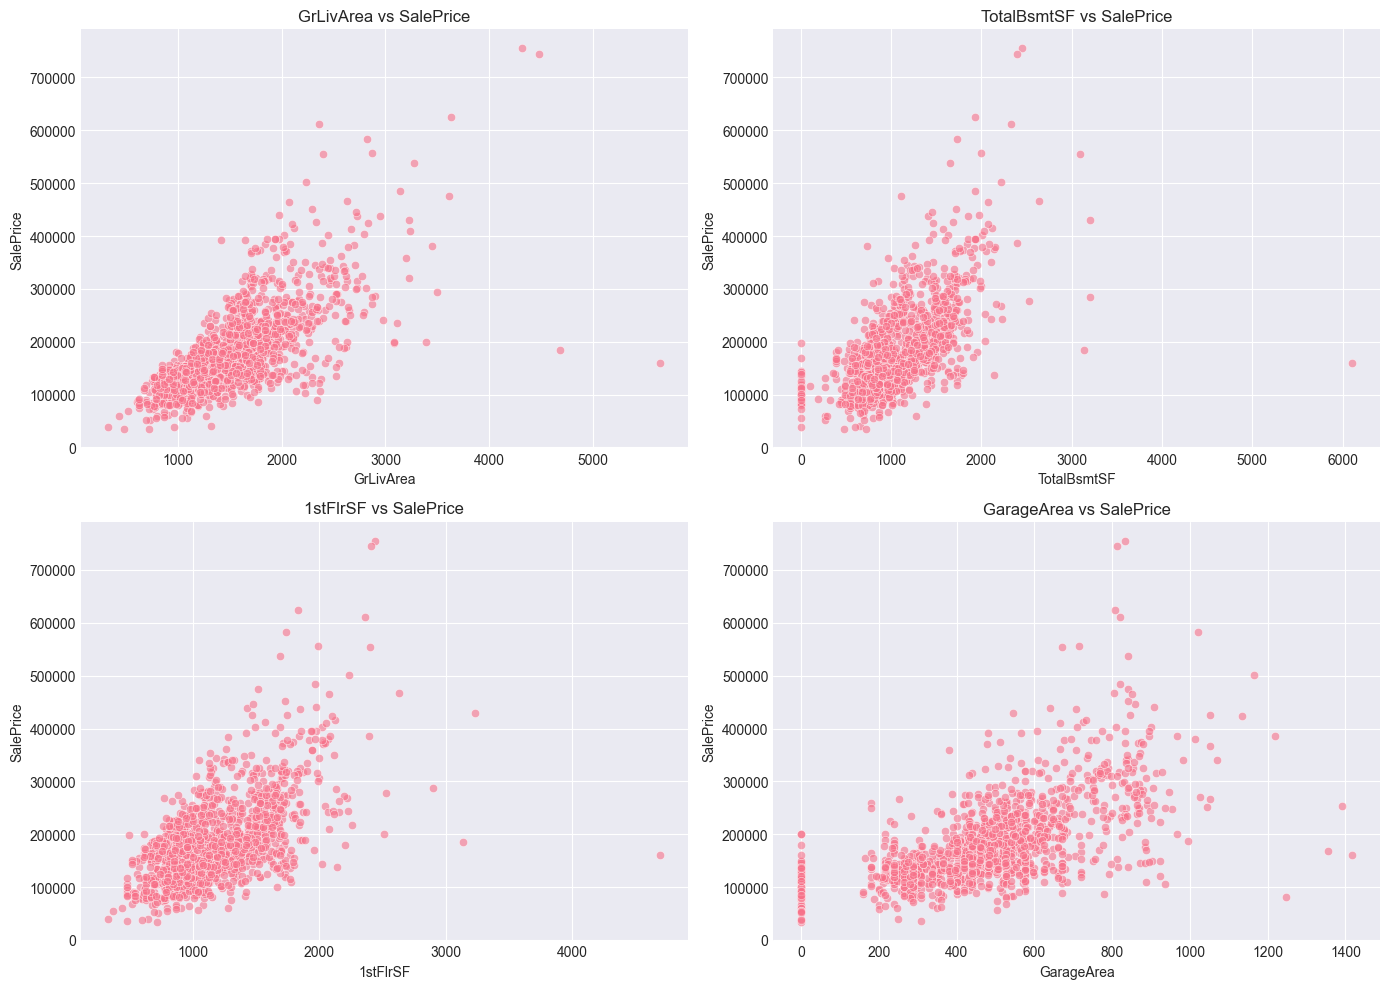

⚠️ Observación:
- Se detectan propiedades con áreas muy grandes pero precios relativamente bajos
- Estas observaciones serán tratadas o eliminadas en preprocessing


In [12]:
outlier_features = [
    'GrLivArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'GarageArea'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(outlier_features):
    sns.scatterplot(
        x=train[feature],
        y=train['SalePrice'],
        ax=axes[i],
        alpha=0.6
    )
    axes[i].set_title(f"{feature} vs SalePrice")

plt.tight_layout()
plt.show()

print("⚠️ Observación:")
print("- Se detectan propiedades con áreas muy grandes pero precios relativamente bajos")
print("- Estas observaciones serán tratadas o eliminadas en preprocessing")

## 7. Matriz de Correlación

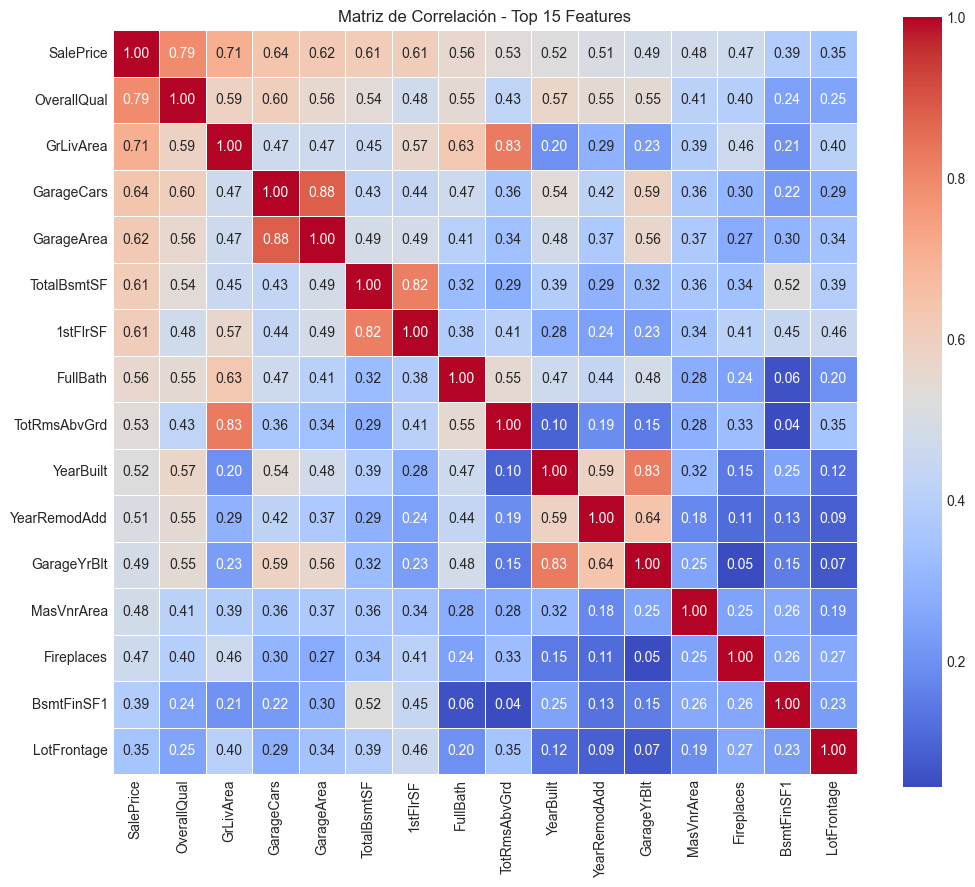

In [13]:
# Seleccionar top 15 features más correlacionadas con SalePrice
top15_features = corr_target.head(16).index  # incluye SalePrice

corr_matrix = train[top15_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)
plt.title("Matriz de Correlación - Top 15 Features")
plt.show()